In [293]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Word lists and lexicons in nltk: https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("This is a really great tweet!")

# Output:
# [nltk_data] Downloading package vader_lexicon to /root/nltk_data...
# [nltk_data]   Package vader_lexicon is already up-to-date!
# {'compound': 0.6893, 'neg': 0.0, 'neu': 0.461, 'pos': 0.539}

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ZyroY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6893}

In [294]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('tw_tweets_users_media_places.csv')
df.head()




,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
0,1440484799970304000,This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchiti...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1,1439618825171963904,Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
2,1248872872837332992,Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the ...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
3,1250729294051053568,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
4,1249612131433095168,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [295]:
# First, check the data types
print("\nData types in the dataset:")
print(df.dtypes)
# Select only numerical columns


Data types in the dataset:
tweet_id                       int64
text                          object
context_annotations_count      int64
count_annotations            float64
count_cashtags               float64
count_hashtags               float64
count_mentions               float64
count_urls                   float64
created_at_tweet              object
lang                          object
likes                          int64
quotes                         int64
referenced_tweet_count         int64
replies                        int64
reply_settings                object
retweets                       int64
source                        object
terms                         object
username                      object
created_at_author             object
followers_count                int64
following_count                int64
tweet_count                    int64
listed_count                   int64
location                      object
protected                       bool
verified  

In [296]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Ensure 'text' column is string and handle NaNs
df['text'] = df['text'].astype(str).fillna('')

# Initialize sentiment columns
df['sentiment_overall'] = 0.0
df['sentiment_neg'] = 0.0
df['sentiment_neu'] = 0.0
df['sentiment_pos'] = 0.0

# Perform sentiment analysis
for row in df.itertuples():
    sentiment = sia.polarity_scores(row.text)
    df.loc[row.Index, 'sentiment_overall'] = sentiment['compound']
    df.loc[row.Index, 'sentiment_neg'] = sentiment['neg']
    df.loc[row.Index, 'sentiment_neu'] = sentiment['neu']
    df.loc[row.Index, 'sentiment_pos'] = sentiment['pos']


In [297]:
df = df.select_dtypes(include=['number', 'float64', 'int64'])

In [298]:
import statsmodels.api as sm


y = df['retweets']
X = df.drop(columns=['retweets', 'sentiment_overall', 'context_annotations_count', 'count_annotations', 'count_cashtags', 'count_hashtags', 
                     'count_mentions', 'count_urls', 'referenced_tweet_count', 'listed_count', 'width', 'height', 'tweet_count', 
                     'sentiment_neu', 'sentiment_neg', 'sentiment_pos', 'likes', 'quotes', 'replies', 'following_count']).assign(const=1)

print(sm.OLS(y, X).fit().summary())

# Output:
# R-squared: 0.246

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     32.46
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.02e-08
Time:                        22:41:57   Log-Likelihood:                -2333.5
No. Observations:                 534   AIC:                             4671.
Df Residuals:                     532   BIC:                             4680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tweet_id         3.061e-18   6.41e-19     

#### retweets=(−1.601 * 10^-12) + ((3.061 * 10^-18) * tweet_id) + ((8.242 * 10^-5) * followers_count)
#### Our model goes as above

#### The significant predictors of retweets are **followers_count** (p < 0.001) and **tweet_id** (p < 0.001). More followers correlate with more retweets, while tweet_id likely reflects time-based effects. Sentiment variables were not significant, as they were not included in the final model.

In [299]:
df = pd.read_csv('tw_tweets_users_media_places.csv')
df.head()


,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
0,1440484799970304000,This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchiti...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1,1439618825171963904,Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
2,1248872872837332992,Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the ...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
3,1250729294051053568,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
4,1249612131433095168,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [300]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [301]:
import sys
import re
import numpy as np
from pprint import pprint
    
# Gensim
import gensim, spacy, logging, warnings
import spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
    
# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'co']) # After reviewing the LDA, return to add words that you want to eliminate

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZyroY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [302]:
# Print total number of tweets
print(f'Total tweets: {len(df)}')

# Remove retweets by checking if 'RT @' appears in the 'text' column
df_no_retweets = df[~df['text'].str.contains("RT @", na=False)]

# Print number of original tweets (after removing retweets)
print(f'Original tweets: {len(df)}')


Total tweets: 534
Original tweets: 534


In [303]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert each tweet to a list of cleaned words and add to a master list
data = df_no_retweets['text'].values.tolist()  # Correct column access for df_no_retweets
data_words = list(sent_to_words(data))

# Print the first 5 cleaned tweet word lists
for tweet in data_words[:10]:
    print(tweet)

['this', 'was', 'my', 'grandson', 'this', 'morning', 'autism', 'apparently', 'he', 'is', 'going', 'through', 'bout', 'of', 'bronchitis', 'amp', 'pneumonia', 'he', 'always', 'gets', 'it', 'every', 'year', 'my', 'daughter', 'said', 'that', 'she', 'is', 'sure', 'she', 'will', 'have', 'to', 'take', 'him', 'to', 'the', 'hospital', 'tonight', 'but', 'if', 'they', 'try', 'to', 'test', 'him', 'for', 'covid', 'she', 'will', 'walk', 'out', 'https', 'co', 'krqjit']
['wow', 'been', 'into', 'york', 'for', 'the', 'first', 'time', 'since', 'christmas', 'shopping', 'in', 'dec', 'took', 'our', 'daughter', 'cerys', 'to', 'the', 'catcafe', 'to', 'celebrate', 'her', 'th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'and', 'autism', 'friendly', 'she', 'was', 'in', 'her', 'happy', 'place', 'https', 'co', 'qzck', 'fze']
['sad', 'number', 'of', 'ppl', 'who', 'lost', 'life', 'due', 'to', 'covid', 'is', 'far', 'more', 'than', 'the', 'number', 'that', 'it', 'says', 'on', 'the', 'news', 't

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ZyroY\AppData\Local\Temp\ipykernel_21064\375990847.py:3: SyntaxWarning: invalid escape sequence '\S'
  sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
C:\Users\ZyroY\AppData\Local\Temp\ipykernel_21064\375990847.py:4: SyntaxWarning: invalid escape sequence '\s'
  sent = re.sub('\s+', ' ', sent)  # remove newline chars


In [304]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [305]:
# !python -m spacy download en_core_web_sm
import spacy

In [306]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # remove stop words using list comprehension
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    # add bigrams and trigrams using list comprehension
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
            
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])    # Load spacy, but we don't need the parser or NER (named entity extraction) modules
        
    # perform lemmatization and another round of stopword removal to catch any that were created by the lemmatization process
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
             
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      
    return texts_out


In [307]:
data_ready = process_words(data_words)  # processed Text Data!
for tweet in data_ready[:5]:
    print(tweet)

c:\Users\ZyroY\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


['morning', 'autism', 'apparently', 'go', 'bout', 'pneumonia', 'always', 'get', 'year', 'daughter', 'say', 'sure', 'take', 'hospital', 'tonight', 'try', 'test']
['first', 'time', 'shopping', 'take', 'daughter', 'celebrate', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', 'https', 'qzck', 'fze']
['sad', 'number', 'lose', 'life', 'due', 'covid', 'far', 'number', 'say', 'news', 'pass', 'care', 'home', 'support', 'live', 'community', 'count', 'give', 'think', 'autistic', 'people', 'amp', 'life', 'matter', 'bqeupxe']
['webinar', 'available', 'stay', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'hardy', 'autism', 'socialcare', 'sjrm']
['webinar', 'available', 'stay', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'hardy', 'autism', 'socialcare', 'auevngqt']


In [308]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
        
for row in id2word.iteritems():
    print(row)

(0, 'always')
(1, 'apparently')
(2, 'autism')
(3, 'bout')
(4, 'daughter')
(5, 'get')
(6, 'go')
(7, 'hospital')
(8, 'morning')
(9, 'pneumonia')
(10, 'say')
(11, 'sure')
(12, 'take')
(13, 'test')
(14, 'tonight')
(15, 'try')
(16, 'year')
(17, 'birthday')
(18, 'celebrate')
(19, 'covid')
(20, 'first')
(21, 'friendly')
(22, 'fze')
(23, 'happy')
(24, 'https')
(25, 'perfectly')
(26, 'place')
(27, 'quiet')
(28, 'qzck')
(29, 'relaxed')
(30, 'shopping')
(31, 'time')
(32, 'unfriendly')
(33, 'amp')
(34, 'autistic')
(35, 'bqeupxe')
(36, 'care')
(37, 'community')
(38, 'count')
(39, 'due')
(40, 'far')
(41, 'give')
(42, 'home')
(43, 'life')
(44, 'live')
(45, 'lose')
(46, 'matter')
(47, 'news')
(48, 'number')
(49, 'pass')
(50, 'people')
(51, 'sad')
(52, 'support')
(53, 'think')
(54, 'available')
(55, 'coronavirus')
(56, 'crisis')
(57, 'deliver')
(58, 'hardy')
(59, 'healthy')
(60, 'sjrm')
(61, 'socialcare')
(62, 'stay')
(63, 'webinar')
(64, 'auevngqt')
(65, 'bq')
(66, 'fhob')
(67, 'miss')
(68, 'watch')
(

In [309]:
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1),
  (4, 1),
  (12, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(10, 1),
  (19, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1),
  (42, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(2, 1),
  (42, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(24, 1), (65, 1), (66, 1), (67, 1), (68, 1)],
 [(2, 1), (12, 1), (69, 1), (70, 1), (71, 1), (7

In [310]:
topics = 6
            
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, # This is the corpus we created above
                                                    id2word=id2word, # This is the dictionary we created above
                                                    num_topics=topics,
                                                    random_state=12345,
                                                    chunksize=100,
                                                    passes=5,
                                                    per_word_topics=True)
            
ldatopics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics())

[(0,
  '0.032*"autism" + 0.015*"boy" + 0.013*"lockdown" + 0.013*"need" + '
  '0.010*"video" + 0.009*"piece" + 0.009*"connect" + 0.009*"good" + '
  '0.009*"shutdown" + 0.009*"covid"'),
 (1,
  '0.035*"autism" + 0.034*"https" + 0.019*"child" + 0.018*"covid" + '
  '0.018*"school" + 0.015*"work" + 0.013*"young" + 0.011*"birthday" + '
  '0.010*"people" + 0.009*"coronavirus"'),
 (2,
  '0.027*"month" + 0.026*"autism" + 0.018*"house" + 0.012*"https" + '
  '0.012*"autismawareness" + 0.012*"join" + 0.011*"mask" + 0.010*"http" + '
  '0.010*"wear" + 0.009*"sensory"'),
 (3,
  '0.049*"autism" + 0.019*"https" + 0.017*"autistic" + 0.016*"quarantine" + '
  '0.016*"covid" + 0.016*"home" + 0.014*"awareness" + 0.014*"want" + '
  '0.014*"support" + 0.014*"son"'),
 (4,
  '0.040*"pandemic" + 0.035*"autism" + 0.016*"https" + 0.015*"give" + '
  '0.014*"life" + 0.013*"autistic" + 0.011*"find" + 0.010*"person" + '
  '0.010*"covid" + 0.010*"hard"'),
 (5,
  '0.032*"autism" + 0.024*"autistic" + 0.020*"covid" + 0.016

In [311]:
df_fit = pd.DataFrame(columns=['topics', 'perplexity', 'coherence'])

for n in range(3,10):
    # Fit LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                      id2word=id2word, 
                                                      num_topics=n, 
                                                      random_state=12345,
                                                      chunksize=100, 
                                                      passes=5,
                                                      per_word_topics=True)
        
    # Generate fit metrics
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    # Add metrics to df_fit
    df_fit.loc[str(n - 3)] = [n, round(lda_model.log_perplexity(corpus), 3), round(coherence_model_lda.get_coherence(), 3)]
        
df_fit

,topics,perplexity,coherence
0,3.0,-7.533,0.259
1,4.0,-7.622,0.252
2,5.0,-7.704,0.312
3,6.0,-7.747,0.352
4,7.0,-7.798,0.331
5,8.0,-7.831,0.355
6,9.0,-7.849,0.356


C:\Users\ZyroY\AppData\Local\Temp\ipykernel_21064\2134088631.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='topics', y='diff', data=df_fit, ci=None, marker='o');


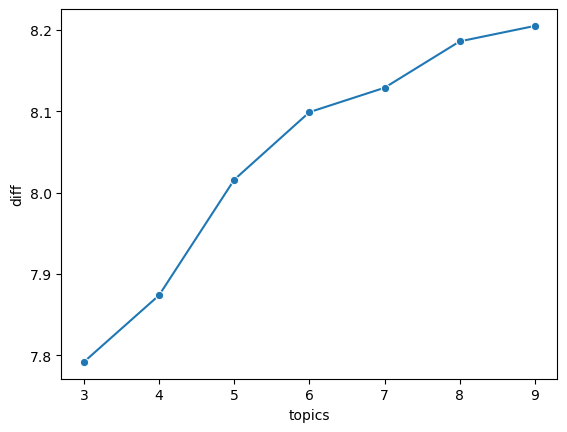

In [312]:
import seaborn as sns
        
df_fit['diff'] = abs(df_fit.coherence - df_fit.perplexity)
sns.lineplot(x='topics', y='diff', data=df_fit, ci=None, marker='o');

In [313]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              id2word=id2word, 
                                              num_topics=6, 
                                              random_state=1,
                                              chunksize=100, 
                                              passes=5,
                                              per_word_topics=True)

#NOTICE THE ABOVE CODE IS SLIGHTLY DIFFERENT FROM YOUR BOOK

df_topics = df.copy()
        
num_topics = len(lda_model.get_topics()) # store the number of topics from the last model
for col in range(num_topics): # generate a new column for each topic
    df_topics[f'topic_{col + 1}'] = 0.0
          
        # Store the topic score and dominant topic
for i, words in enumerate(data_ready):
    doc = lda_model[id2word.doc2bow(words)] # generate a corpus for this document set of words
          
    for j, score in enumerate(doc[0]): # for each document in the corpus
            # Get the topic score and store it in the appropriate column
        df_topics.iat[i, (len(df_topics.columns) - ((num_topics) - score[0]))] = score[1]
        
df_topics.head()
        

,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,preview_image_url,country,name_place,place_type,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,1440484799970304000,This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchiti...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,0.409501,0.348409,0.000000,0.000000,0.000000,0.214080
1,1439618825171963904,Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,0.000000,0.000000,0.958201,0.000000,0.000000,0.000000
2,1248872872837332992,Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the ...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,0.550157,0.000000,0.000000,0.000000,0.000000,0.424067
3,1250729294051053568,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,0.012896,0.506578,0.012851,0.441965,0.012841,0.012869
4,1249612131433095168,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,0.012902,0.400456,0.012852,0.548075,0.012840,0.012875


In [314]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
        
        # Create the output DataFrame
df_representative_tweets = pd.DataFrame(columns=df_topics.columns)
        
        # Iterate through each topic
for n in range(1, num_topics + 1):
          # Copy the row from the original df with the highest topic score into the new df
    df_representative_tweets.loc['topic_' + str(n)] = df_topics.loc[df_topics['topic_' + str(n)].idxmax()]
        
df_representative_tweets

,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,preview_image_url,country,name_place,place_type,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
topic_1,1254773058209853440,I’m surprised how well that I’m copping with this lockdown because I think mainly painting my po...,6,0.0,0.0,0.0,0.0,1.0,2020-04-27T14:03:04.000Z,en,...,https://pbs.twimg.com/media/EWnZcMmU8AQV9M8.jpg,United Kingdom,Yarm,city,0.967806,0.0,0.0,0.0,0.0,0.0
topic_2,1235409529426153472,"I apologise for my previous tweets. Yes, I’m autistic but I seriously don’t understand why peopl...",1,0.0,0.0,0.0,0.0,1.0,2020-03-05T03:39:19.000Z,en,...,https://pbs.twimg.com/tweet_video_thumb/ESUOakuU4AAuGoU.jpg,Australia,Brisbane,city,0.0,0.958268,0.0,0.0,0.0,0.0
topic_3,1266724717026631680,It took me lockdown 4.0 to find my favourite series. The story of a surgery resident w/ autism &...,3,0.0,0.0,0.0,0.0,1.0,2020-05-30T13:34:41.000Z,en,...,https://pbs.twimg.com/media/EZRPZtIUMAEj2gL.jpg,India,India,country,0.0,0.0,0.968952,0.0,0.0,0.0
topic_4,1417578043808354304,"10:10 7.20.2021 ☆Time to audit Police, Drug Cartel ☆Media Broadcasting, by Judge ☆Judy McGee: ☆P...",1,1.0,0.0,0.0,0.0,1.0,2021-07-20T20:11:57.000Z,en,...,https://pbs.twimg.com/media/E6w_t8vVEAMhhmA.jpg,United States,Ainaloa,city,0.0,0.0,0.0,0.958058,0.0,0.0
topic_5,1330467358448652288,?Why do all the INSERTS say vaccines cause autism? Sweden proved vitamin C stops Covid making va...,1,3.0,0.0,0.0,0.0,1.0,2020-11-22T11:05:11.000Z,en,...,https://pbs.twimg.com/ext_tw_video_thumb/1330466823637123074/pu/img/hyDB6Y-HlD1JmssP.jpg,United States,California,admin,0.011965,0.011921,0.011951,0.011958,0.940228,0.011977
topic_6,1245719840691757056,"World autism day today, I’m very proud of my son pictured, the world is a scary place even more ...",1,0.0,0.0,1.0,0.0,1.0,2020-04-02T14:28:49.000Z,en,...,https://pbs.twimg.com/media/EUmvlxKX0AIXKcm.jpg,United Kingdom,Portsmouth,city,0.0,0.0,0.0,0.0,0.0,0.960205


In [315]:
print("Perplexity:", lda_model.log_perplexity(corpus))


Perplexity: -7.726774099964889


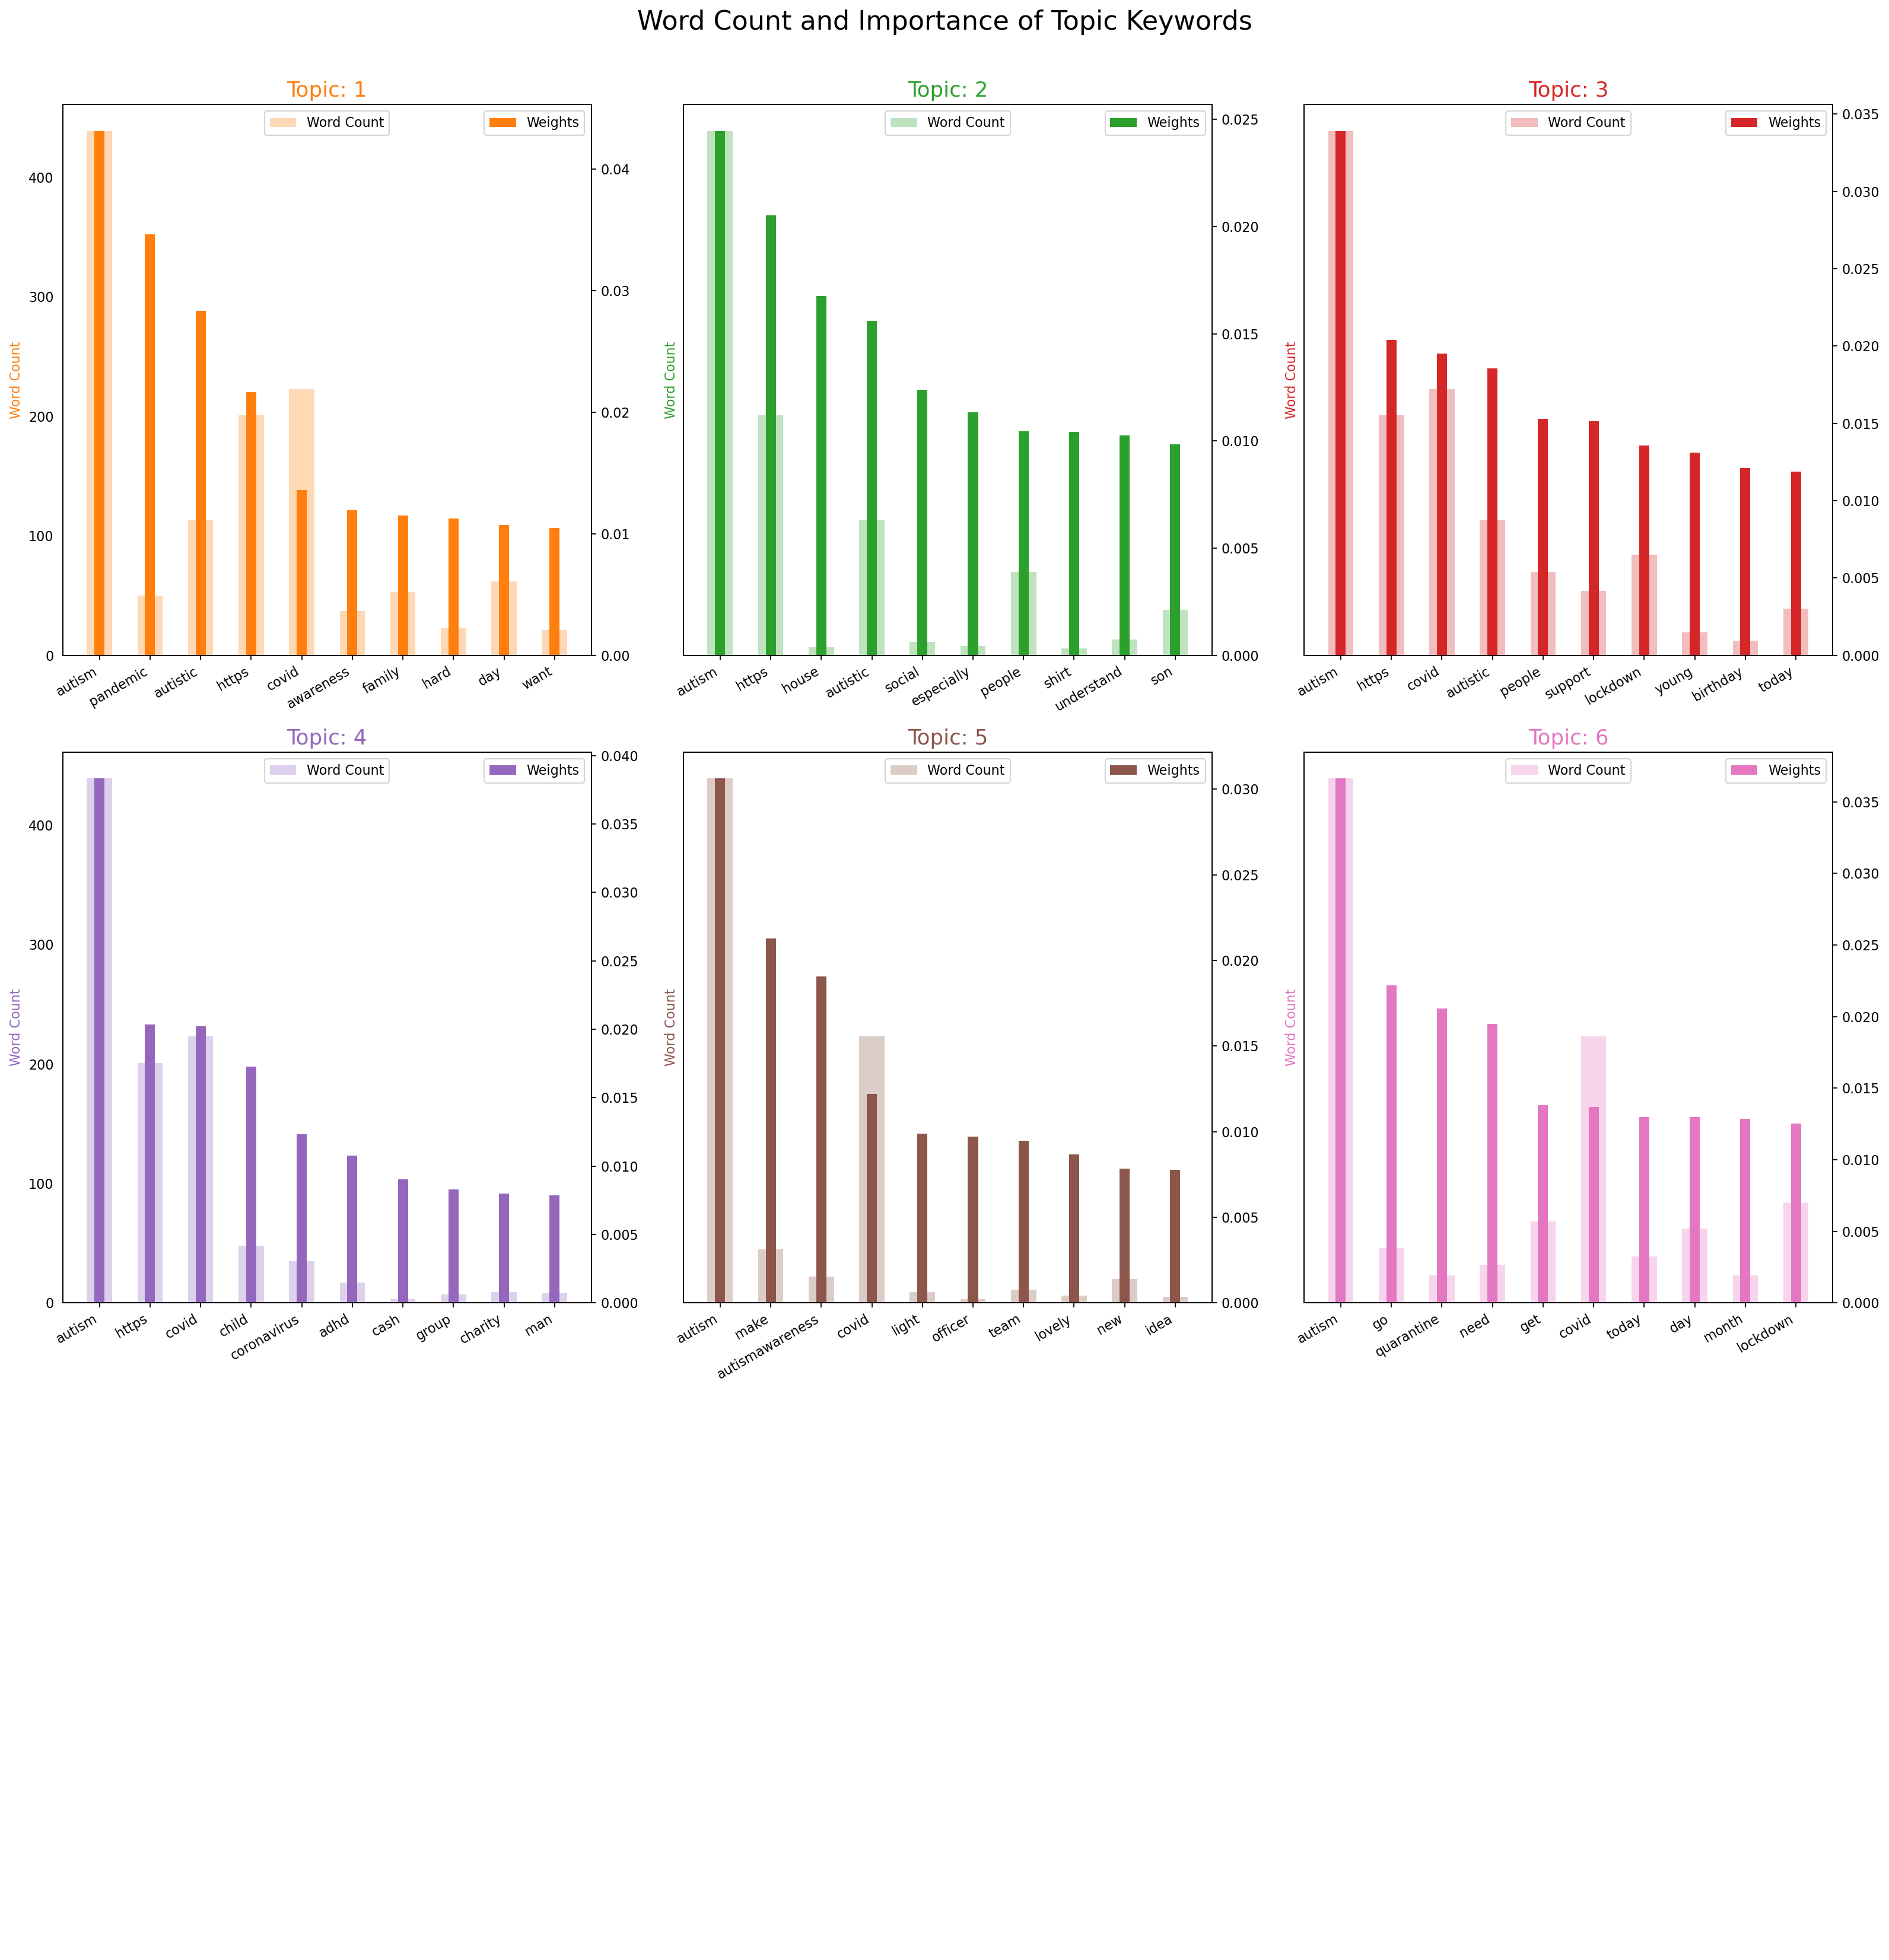

In [316]:
# Bar chart of word counts for each topic
from collections import Counter
import matplotlib.colors as mcolors, math

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
  for word, weight in topic:
    out.append([word, i + 1, weight, counter[word]])

df_temp = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
matrix_size = math.ceil(num_topics**(1/2))  # Computes the n by n number of plots to generate
fig, axes = plt.subplots(matrix_size, matrix_size, figsize=(20,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
  ax.bar(x='word', height="word_count", data=df_temp.loc[df_temp.topic_id==i+1, :], color=cols[i+1], width=0.5, alpha=0.3, label='Word Count')
  ax_twin = ax.twinx()
  ax_twin.bar(x='word', height="importance", data=df_temp.loc[df_temp.topic_id==i+1, :], color=cols[i+1], width=0.2, label='Weights')
  ax.set_ylabel('Word Count', color=cols[i+1])
  ax.set_title('Topic: ' + str(i + 1), color=cols[i+1], fontsize=16)
  ax.tick_params(axis='y', left=False)
  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(df_temp.loc[df_temp.topic_id==i+1, 'word'], rotation=30, horizontalalignment= 'right')
  ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')
  if i >= len(topics): # Turn off the unneeded subplots
    ax.axis('off')
    ax.title.set_visible(False)
    ax_twin.axis('off')
    ax.legend().set_visible(False)
    ax_twin.legend().set_visible(False)

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.03)
plt.show()

In [317]:
for topic_id in range(1, num_topics+1):
    print(f"Topic {topic_id}:")
    
    # Get the top words based on word count
    top_words_by_count = df_temp[df_temp['topic_id'] == topic_id].sort_values(by='word_count', ascending=False).head(10)
    print("Top words by count:")
    for word, count in zip(top_words_by_count['word'], top_words_by_count['word_count']):
        print(f"{word}: {count} occurrences")
    
    # Get the top words based on importance (weight)
    top_words_by_importance = df_temp[df_temp['topic_id'] == topic_id].sort_values(by='importance', ascending=False).head(10)
    print("Top words by importance:")
    for word, importance in zip(top_words_by_importance['word'], top_words_by_importance['importance']):
        print(f"{word}: importance {importance:.3f}")
    
    print("\n")


Topic 1:
Top words by count:
autism: 439 occurrences
covid: 223 occurrences
https: 201 occurrences
autistic: 113 occurrences
day: 62 occurrences
family: 53 occurrences
pandemic: 50 occurrences
awareness: 37 occurrences
hard: 23 occurrences
want: 21 occurrences
Top words by importance:
autism: importance 0.043
pandemic: importance 0.035
autistic: importance 0.028
https: importance 0.022
covid: importance 0.014
awareness: importance 0.012
family: importance 0.011
hard: importance 0.011
day: importance 0.011
want: importance 0.010


Topic 2:
Top words by count:
autism: 439 occurrences
https: 201 occurrences
autistic: 113 occurrences
people: 70 occurrences
son: 38 occurrences
understand: 13 occurrences
social: 11 occurrences
especially: 8 occurrences
house: 7 occurrences
shirt: 6 occurrences
Top words by importance:
autism: importance 0.024
https: importance 0.021
house: importance 0.017
autistic: importance 0.016
social: importance 0.012
especially: importance 0.011
people: importance 0.0

In [318]:
# First, check the data types
print("\nData types in the dataset:")
print(df.dtypes)
# Select only numerical columns


Data types in the dataset:
tweet_id                       int64
text                          object
context_annotations_count      int64
count_annotations            float64
count_cashtags               float64
count_hashtags               float64
count_mentions               float64
count_urls                   float64
created_at_tweet              object
lang                          object
likes                          int64
quotes                         int64
referenced_tweet_count         int64
replies                        int64
reply_settings                object
retweets                       int64
source                        object
terms                         object
username                      object
created_at_author             object
followers_count                int64
following_count                int64
tweet_count                    int64
listed_count                   int64
location                      object
protected                       bool
verified  

In [319]:
df_topics.head()

,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,preview_image_url,country,name_place,place_type,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,1440484799970304000,This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchiti...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,0.409501,0.348409,0.000000,0.000000,0.000000,0.214080
1,1439618825171963904,Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,0.000000,0.000000,0.958201,0.000000,0.000000,0.000000
2,1248872872837332992,Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the ...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,0.550157,0.000000,0.000000,0.000000,0.000000,0.424067
3,1250729294051053568,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,0.012896,0.506578,0.012851,0.441965,0.012841,0.012869
4,1249612131433095168,Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,0.012902,0.400456,0.012852,0.548075,0.012840,0.012875


In [320]:
import pandas as pd
import statsmodels.api as sm

# Apply get_dummies to encode categorical variables as dummy variables
df_dummies = pd.get_dummies(df_topics, columns=[], drop_first=True)

# Define the dependent variable (y) and independent variables (X)
y = df_dummies['retweets']
X = df_dummies.drop(columns=['retweets', 'context_annotations_count', 'count_annotations', 'count_cashtags', 
    'count_hashtags', 'count_mentions', 'count_urls', 'referenced_tweet_count', 
    'listed_count', 'width', 'height', 'tweet_count', 'quotes', 
    'replies', 'following_count', 'protected', 'text', 'created_at_author', 'created_at_tweet', 'media_type', 'preview_image_url', 'username', 'terms', 'location', 'lang', 'source', 'reply_settings',  'country', 'name_place', 'place_type', 'likes'])

# Convert boolean columns to integers (True -> 1, False -> 0)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Convert any remaining non-numeric columns to numeric, coerce errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on how you want to handle missing data)
X = X.dropna()

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     32.46
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.02e-08
Time:                        22:43:19   Log-Likelihood:                -2333.5
No. Observations:                 534   AIC:                             4671.
Df Residuals:                     532   BIC:                             4680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tweet_id         3.061e-18   6.41e-19     

In [321]:
def calculate_skew_and_transform(df):
    # Original skewness
    original_skew = df['retweets'].skew()

    # Log transformation
    df['log_retweets'] = np.log1p(df['retweets'])  # log1p to handle zero values
    log_skew = df['log_retweets'].skew()

    # Square root transformation
    df['sqrt_retweets'] = np.sqrt(df['retweets'])
    sqrt_skew = df['sqrt_retweets'].skew()

    return original_skew, log_skew, sqrt_skew

# Apply transformations and calculate skewness
original_skew, log_skew, sqrt_skew = calculate_skew_and_transform(df_topics)

# Print the skewness values for each transformation
print(f"Original Skewness (No Transformation): {original_skew}")
print(f"Log Transformation Skewness: {log_skew}")
print(f"Square Root Transformation Skewness: {sqrt_skew}")

Original Skewness (No Transformation): 13.297247408656315
Log Transformation Skewness: 1.572517196447617
Square Root Transformation Skewness: 4.664309560118709


In [322]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Apply get_dummies to encode categorical variables as dummy variables
df_dummies = pd.get_dummies(df_topics, columns=[], drop_first=True)

# Apply a logarithmic transformation to the retweets column to help with normality
y = np.log1p(df_dummies['retweets'])  # log1p is used to handle zero values

# Define the independent variables (X)
X = df_dummies.drop(columns=['retweets', 'log_retweets', 'sqrt_retweets', 'tweet_id', 'context_annotations_count', 'count_annotations', 'count_cashtags', 
    'count_hashtags', 'count_mentions', 'count_urls', 'referenced_tweet_count', 
    'listed_count', 'width', 'height', 'tweet_count', 'quotes', 
    'replies', 'following_count', 'protected', 'text', 'created_at_author', 'created_at_tweet', 'media_type', 'preview_image_url', 'username', 'terms', 'location', 'lang', 'source', 'reply_settings',  'country', 'name_place', 'place_type', 'likes'])

# Convert boolean columns to integers (True -> 1, False -> 0)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Convert any remaining non-numeric columns to numeric, coerce errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on how you want to handle missing data)
X = X.dropna()

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:               retweets   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              61.31
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                    2.01e-70
Time:                        22:43:19   Log-Likelihood:                         -687.26
No. Observations:                 534   AIC:                                      1391.
Df Residuals:                     526   BIC:                                      1425.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## Answers

##### I chose six topics because the model with six topics showed slightly better perplexity than the eight-topic model, suggesting a better fit, even though the difference was small. The topics also seemed more interpretable and coherent, with clearer themes emerging from the data. While perplexity is an important factor, the clarity and relevance of the topics matter more for meaningful analysis. So, six topics seemed like a good balance, offering a solid representation of the data without overcomplicating things. Looking back, six might've been too many due to the amount of autism, coronavirus, and quarantine marks.

### Topic Names

- **Topic 1**: "Autism Awareness During the COVID-19 Pandemic"
- **Topic 2**: "Understanding Autism and Social Interactions"
- **Topic 3**: "Autism, COVID-19, and Support During Lockdowns"
- **Topic 4**: "Children’s Health, Autism, and the Coronavirus"
- **Topic 5**: "Autism Awareness and Community Engagement"
- **Topic 6**: "Impact of Lockdowns and Quarantine on Autism Awareness"


##### Applying a log transformation to the retweets variable significantly improved the skewness, reducing it from 13.30 (highly right-skewed) to 1.57, though it did not fully normalize the data. The Jarque-Bera test showed that, despite this improvement, the data still significantly deviates from normality, with a p-value less than 0.05. The square root transformation, on the other hand, only reduced the skewness slightly (to 4.66), showing it was less effective than the log transformation. While the log transformation improved normality, the distribution remains non-normal, suggesting that extreme outliers or a long right tail may still be influencing the data. If normality is crucial for the analysis, further non-parametric methods or additional transformations could be explored.


#### Our final model presents as the following:
#### retweets = 3.725 × 10⁻⁶ × followers_count + 0.5749 × verified + 0.7368 × topic_1 + 0.8131 × topic_2 + 0.6871 × topic_3 + 0.6880 × topic_4 + 0.5373 × topic_5 + 0.6503 × topic_6
